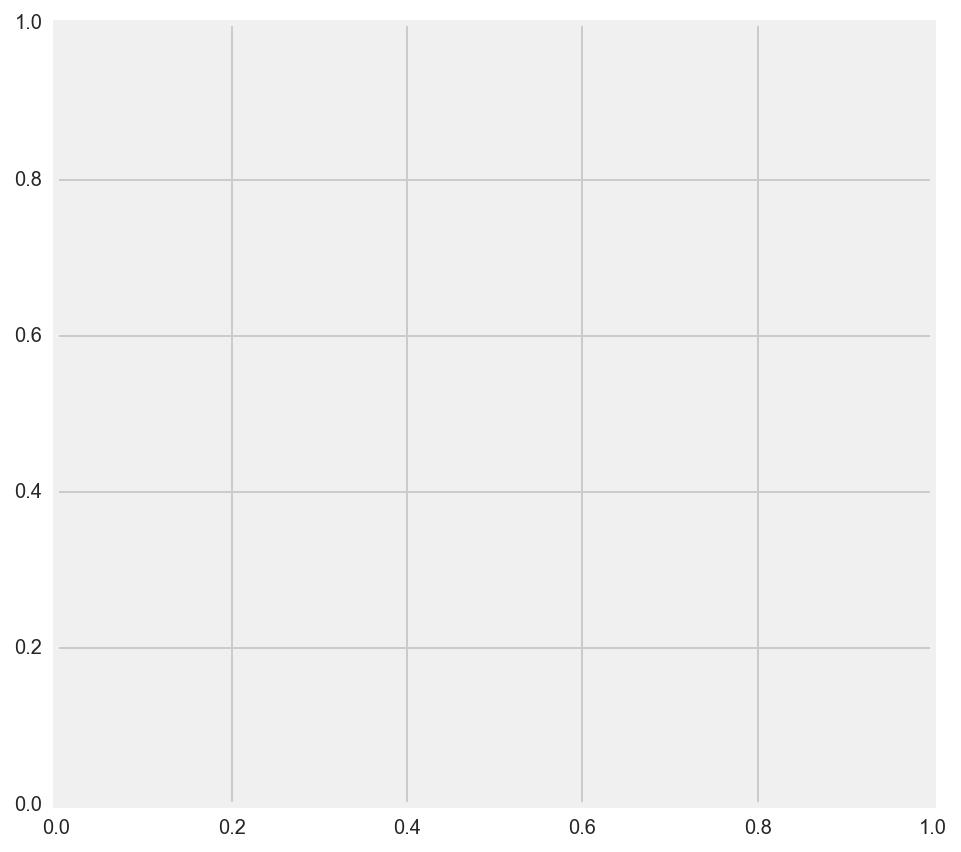

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import patsy

### Graphing
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

# Plot within the jupyter notebook
%matplotlib inline
# Basically, the HD version
%config InlineBackend.figure_format = 'retina'

# Create a figure size
fig = plt.figure(figsize=(7,7))
ax = fig.gca()



In [2]:
df  = pd.read_excel("/Users/KerryChowChow/Data_Science_portfolio/housing_analytics/Dataset.xlsx")

In [3]:
df.head()

,ID,ADDRESS,CITY,STATE,ZIP,ListPrice,BEDS,BATHS,LOCATION,SQFT,...,YearBuilt,ParkingSpots,HasGarage,DOM,LastSaleDate,SoldPrev,Realty,LATITUDE,LONGITUDE,ShortSale
0,4416206,1000 Larpenteur Ave W,St. Paul,MN,55113,214000,3,2.00,Como,1954,...,1918,2,Garage,117,2008-10-06,Y,"Edina Realty, Inc.",44.991634,-93.142616,N
1,4423768,1004 Charles Ave,St. Paul,MN,55104,134900,3,1.00,Thomas-Dale (Frogtown),1028,...,1911,1,Garage,93,2010-11-08,Y,Fish MLS Realty,44.957291,-93.142624,N
2,4427963,1004 Euclid St,St. Paul,MN,55106,129722,4,1.00,Dayton's Bluff,1420,...,1900,0,No Garage,77,NaT,N,Coldwell Banker Burnet,44.954708,-93.057976,N
3,4432178,1005 Saint Anthony Ave,St. Paul,MN,55104,134900,2,1.75,Summit-University,904,...,1928,3,Garage,57,NaT,N,"Real Estate Masters, Ltd.",44.952404,-93.142693,N
4,4440070,100X Chatsworth Pl,Shoreview,MN,55126,444900,4,2.50,Shoreview,2014,...,2014,3,Garage,8,NaT,N,Coldwell Banker Burnet,44.944391,-93.141348,N


In [4]:
df.info()
#get a quick sense of the data. We got some missing values here.
# we have 1111 house listings. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 21 columns):
ID              1111 non-null object
ADDRESS         1111 non-null object
CITY            1111 non-null object
STATE           1111 non-null object
ZIP             1111 non-null int64
ListPrice       1111 non-null int64
BEDS            1111 non-null int64
BATHS           1110 non-null float64
LOCATION        1105 non-null object
SQFT            1111 non-null int64
LotSize         1047 non-null float64
YearBuilt       1111 non-null int64
ParkingSpots    1111 non-null int64
HasGarage       1111 non-null object
DOM             1111 non-null int64
LastSaleDate    378 non-null datetime64[ns]
SoldPrev        1111 non-null object
Realty          1111 non-null object
LATITUDE        1105 non-null float64
LONGITUDE       1105 non-null float64
ShortSale       1111 non-null object
dtypes: datetime64[ns](1), float64(4), int64(7), object(9)
memory usage: 182.3+ KB


# Who should we partner with?
You are home developer looking to partner with the top real estate companies to acquire and then sell a large volume of properties in the Twin Cities area (the more the better). You do not have the resources to manage too many real estate partners and a strict timeline to negotiate the deals.

What realty companies would you pick as your partners? Why would you make that choice? Demonstrate this through analysis, visual display of your results, and description of your methodology of selection.

##### Gaol: Find companies that have historically sell the most houses. 
##### also look at trend. Which companeis have selling more houses over time?

keep in mind, I don't know how many realty companies we want to partner with. 

In [11]:
df.Realty.value_counts().head(10)

RE/MAX Results                    188
Coldwell Banker Burnet            161
Edina Realty, Inc.                155
RE/MAX Specialists                 27
RE/MAX Advantage Plus              27
Keller Williams Premier Realty     27
Keller Williams Integrity RE       24
Keller Williams Integrity          22
The Realty House                   14
Counselor Realty, Inc              14
Name: Realty, dtype: int64

Seems like the market is dominated by big name companies. Also notice that some companies have multiple alternative names like RE/MAX specialists and RE/MAX Advantage Plus.

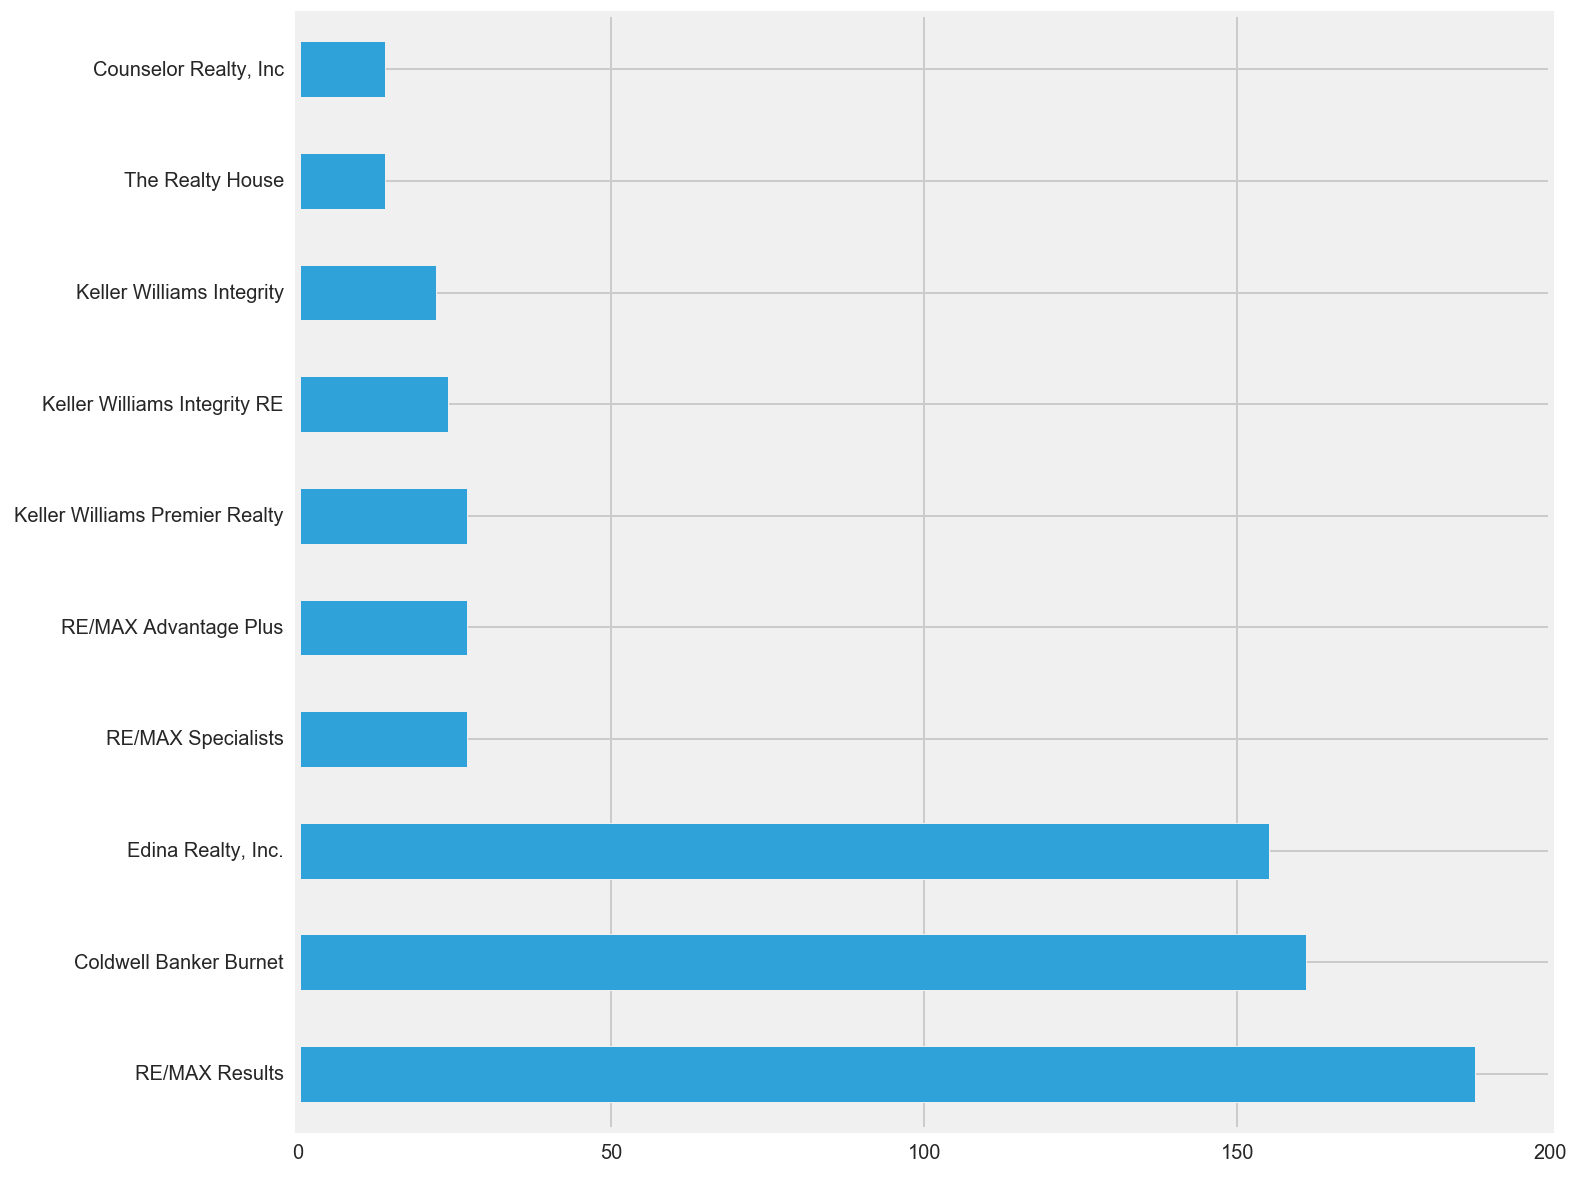

In [91]:
plt.figure(figsize=(10,10))
df.Realty.value_counts().head(10).plot(kind='barh')

In [63]:
values = (df.Realty.value_counts()/1111*100).head(10).tolist() 


In [66]:
new_values = []
for v in values:
    new_values.append(round(v, 2))
new_values

[16.92, 14.49, 13.95, 2.43, 2.43, 2.43, 2.16, 1.98, 1.26, 1.26]

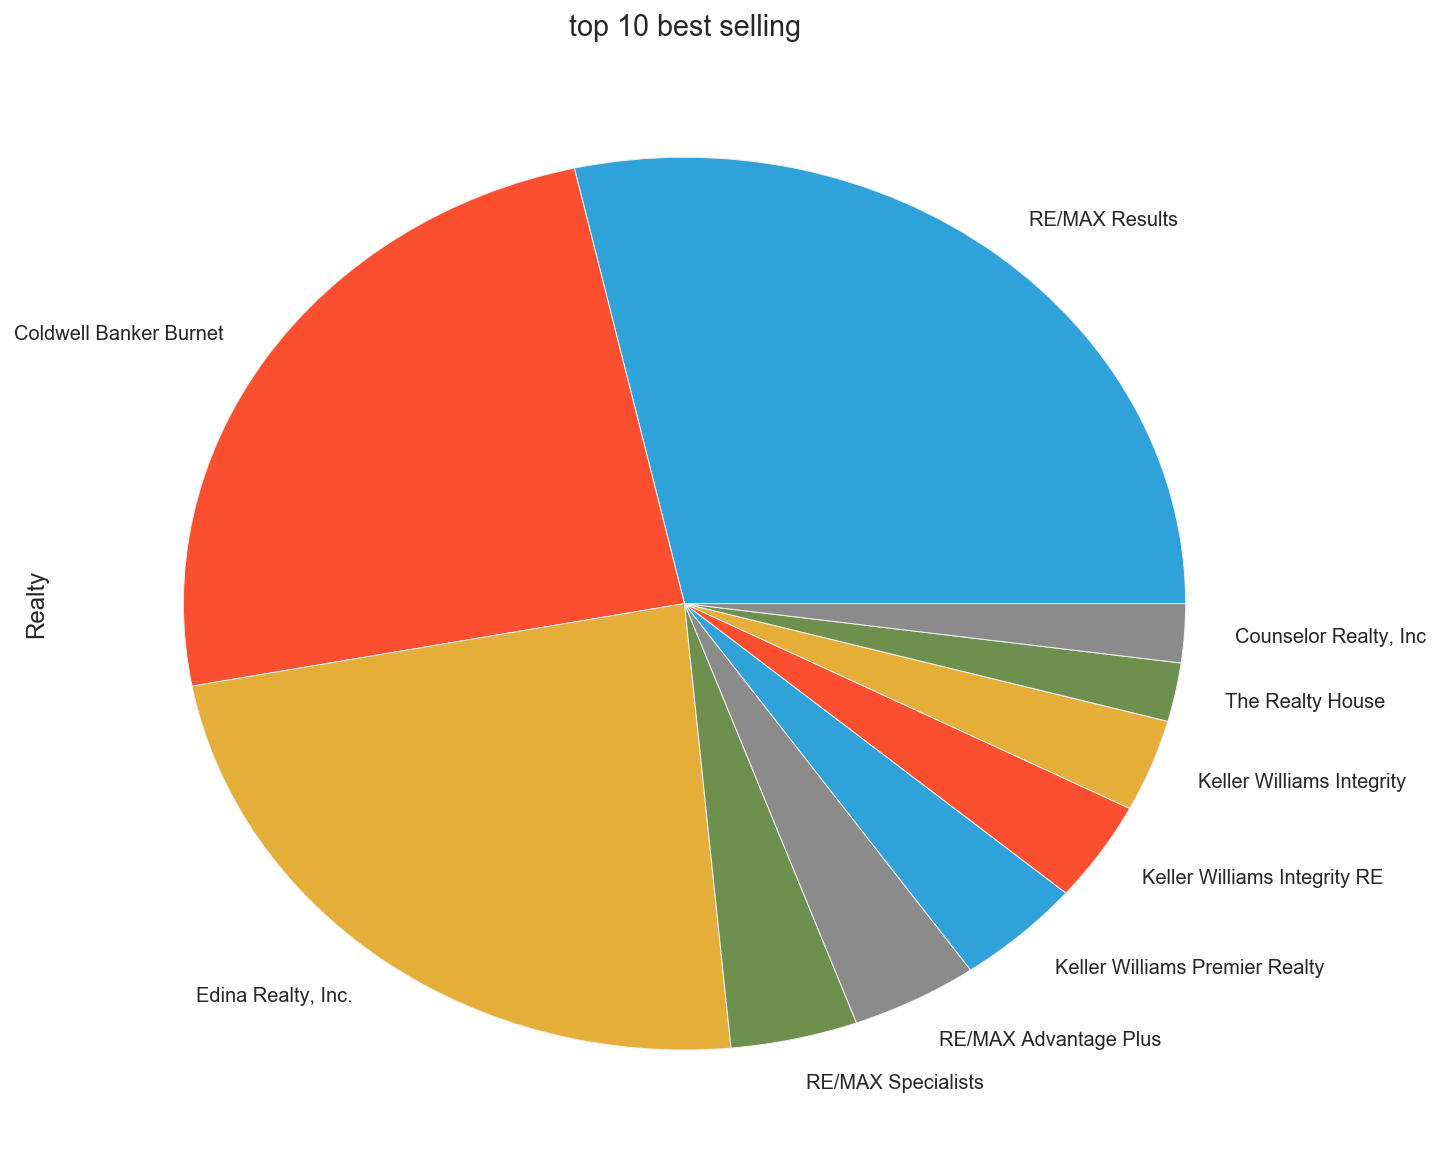

In [88]:
#let's look at pertentage
plt.figure(figsize=(10,10))
(df.Realty.value_counts()/1111*100).head(10).plot(kind='pie',title='top 10 best selling')
#plt.legend(new_values,loc=3)


In [48]:
(df.Realty.value_counts()/1111*100).round().head(10).index.tolist()

[u'RE/MAX Results',
 u'Coldwell Banker Burnet',
 u'Edina Realty, Inc.',
 u'RE/MAX Specialists',
 u'RE/MAX Advantage Plus',
 u'Keller Williams Premier Realty',
 u'Keller Williams Integrity RE',
 u'Keller Williams Integrity',
 u'The Realty House',
 u'Counselor Realty, Inc']

In [98]:
df.Realty.value_counts()[df.Realty.value_counts()>5].count()



26

Out of the 211 companies, only 26 have sold more than 5 houses. Here are some possible reasons:
1. Realty names were documented differented. That means if a company has 5 alternative names, each of them will be counted as an indivisual company. 
2. The market was so dominated by big names companies that smaller realtors were having a hard time to sell more houses.

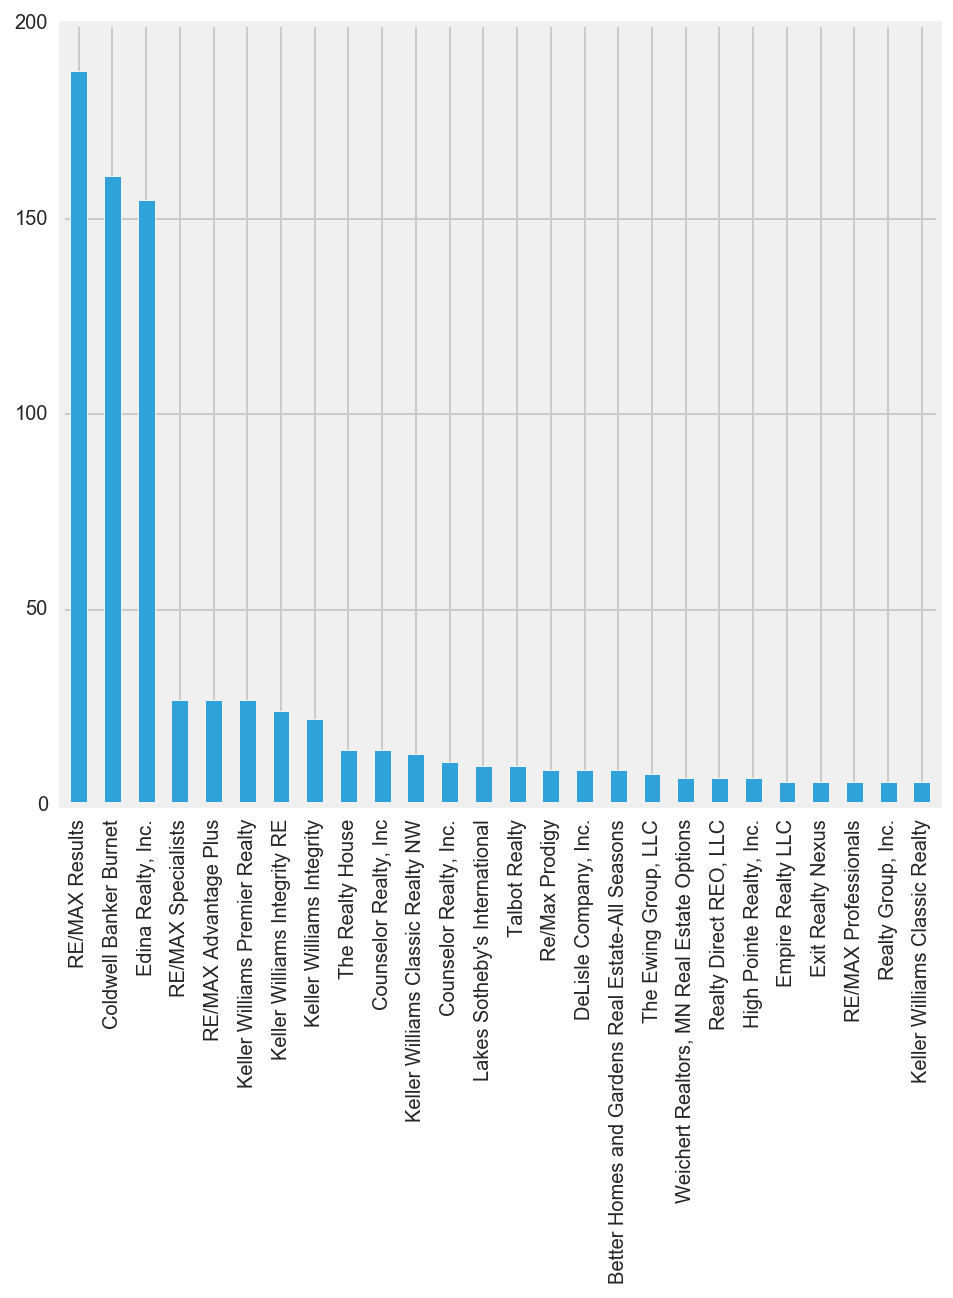

In [102]:
plt.figure(figsize=(7,7))
df.Realty.value_counts()[df.Realty.value_counts()>5].plot(kind='bar')
# noticing the graph is heavily skewed to the right

Based on the graph above, it's obvious that there are 3 top realty companies that have historically sold the highest volumn of houses. If we can get access to the past sales data for those companies, we would be able to see the trends on which companies are going to be the leading realtors in the future. 

[16.92, 14.49, 13.95, 2.43, 2.43, 2.43, 2.16, 1.98, 1.26, 1.26] are the percentages of their listed houses.

# How much should we sell the house for?
All things being equal what would you predict as the listing price for a 2111 square foot house if that was the only information you had on a house in this area? How did you arrive at that estimate? Please explain.

In [103]:
df.head(2)

,ID,ADDRESS,CITY,STATE,ZIP,ListPrice,BEDS,BATHS,LOCATION,SQFT,...,YearBuilt,ParkingSpots,HasGarage,DOM,LastSaleDate,SoldPrev,Realty,LATITUDE,LONGITUDE,ShortSale
0,4416206,1000 Larpenteur Ave W,St. Paul,MN,55113,214000,3,2.0,Como,1954,...,1918,2,Garage,117,2008-10-06,Y,"Edina Realty, Inc.",44.991634,-93.142616,N
1,4423768,1004 Charles Ave,St. Paul,MN,55104,134900,3,1.0,Thomas-Dale (Frogtown),1028,...,1911,1,Garage,93,2010-11-08,Y,Fish MLS Realty,44.957291,-93.142624,N


In [107]:
df[df.SQFT == 2111]
# we don't have a house with 2111 SQFT on sale atm
#next we can look at houses around the similar range of SQFT

,ID,ADDRESS,CITY,STATE,ZIP,ListPrice,BEDS,BATHS,LOCATION,SQFT,...,YearBuilt,ParkingSpots,HasGarage,DOM,LastSaleDate,SoldPrev,Realty,LATITUDE,LONGITUDE,ShortSale


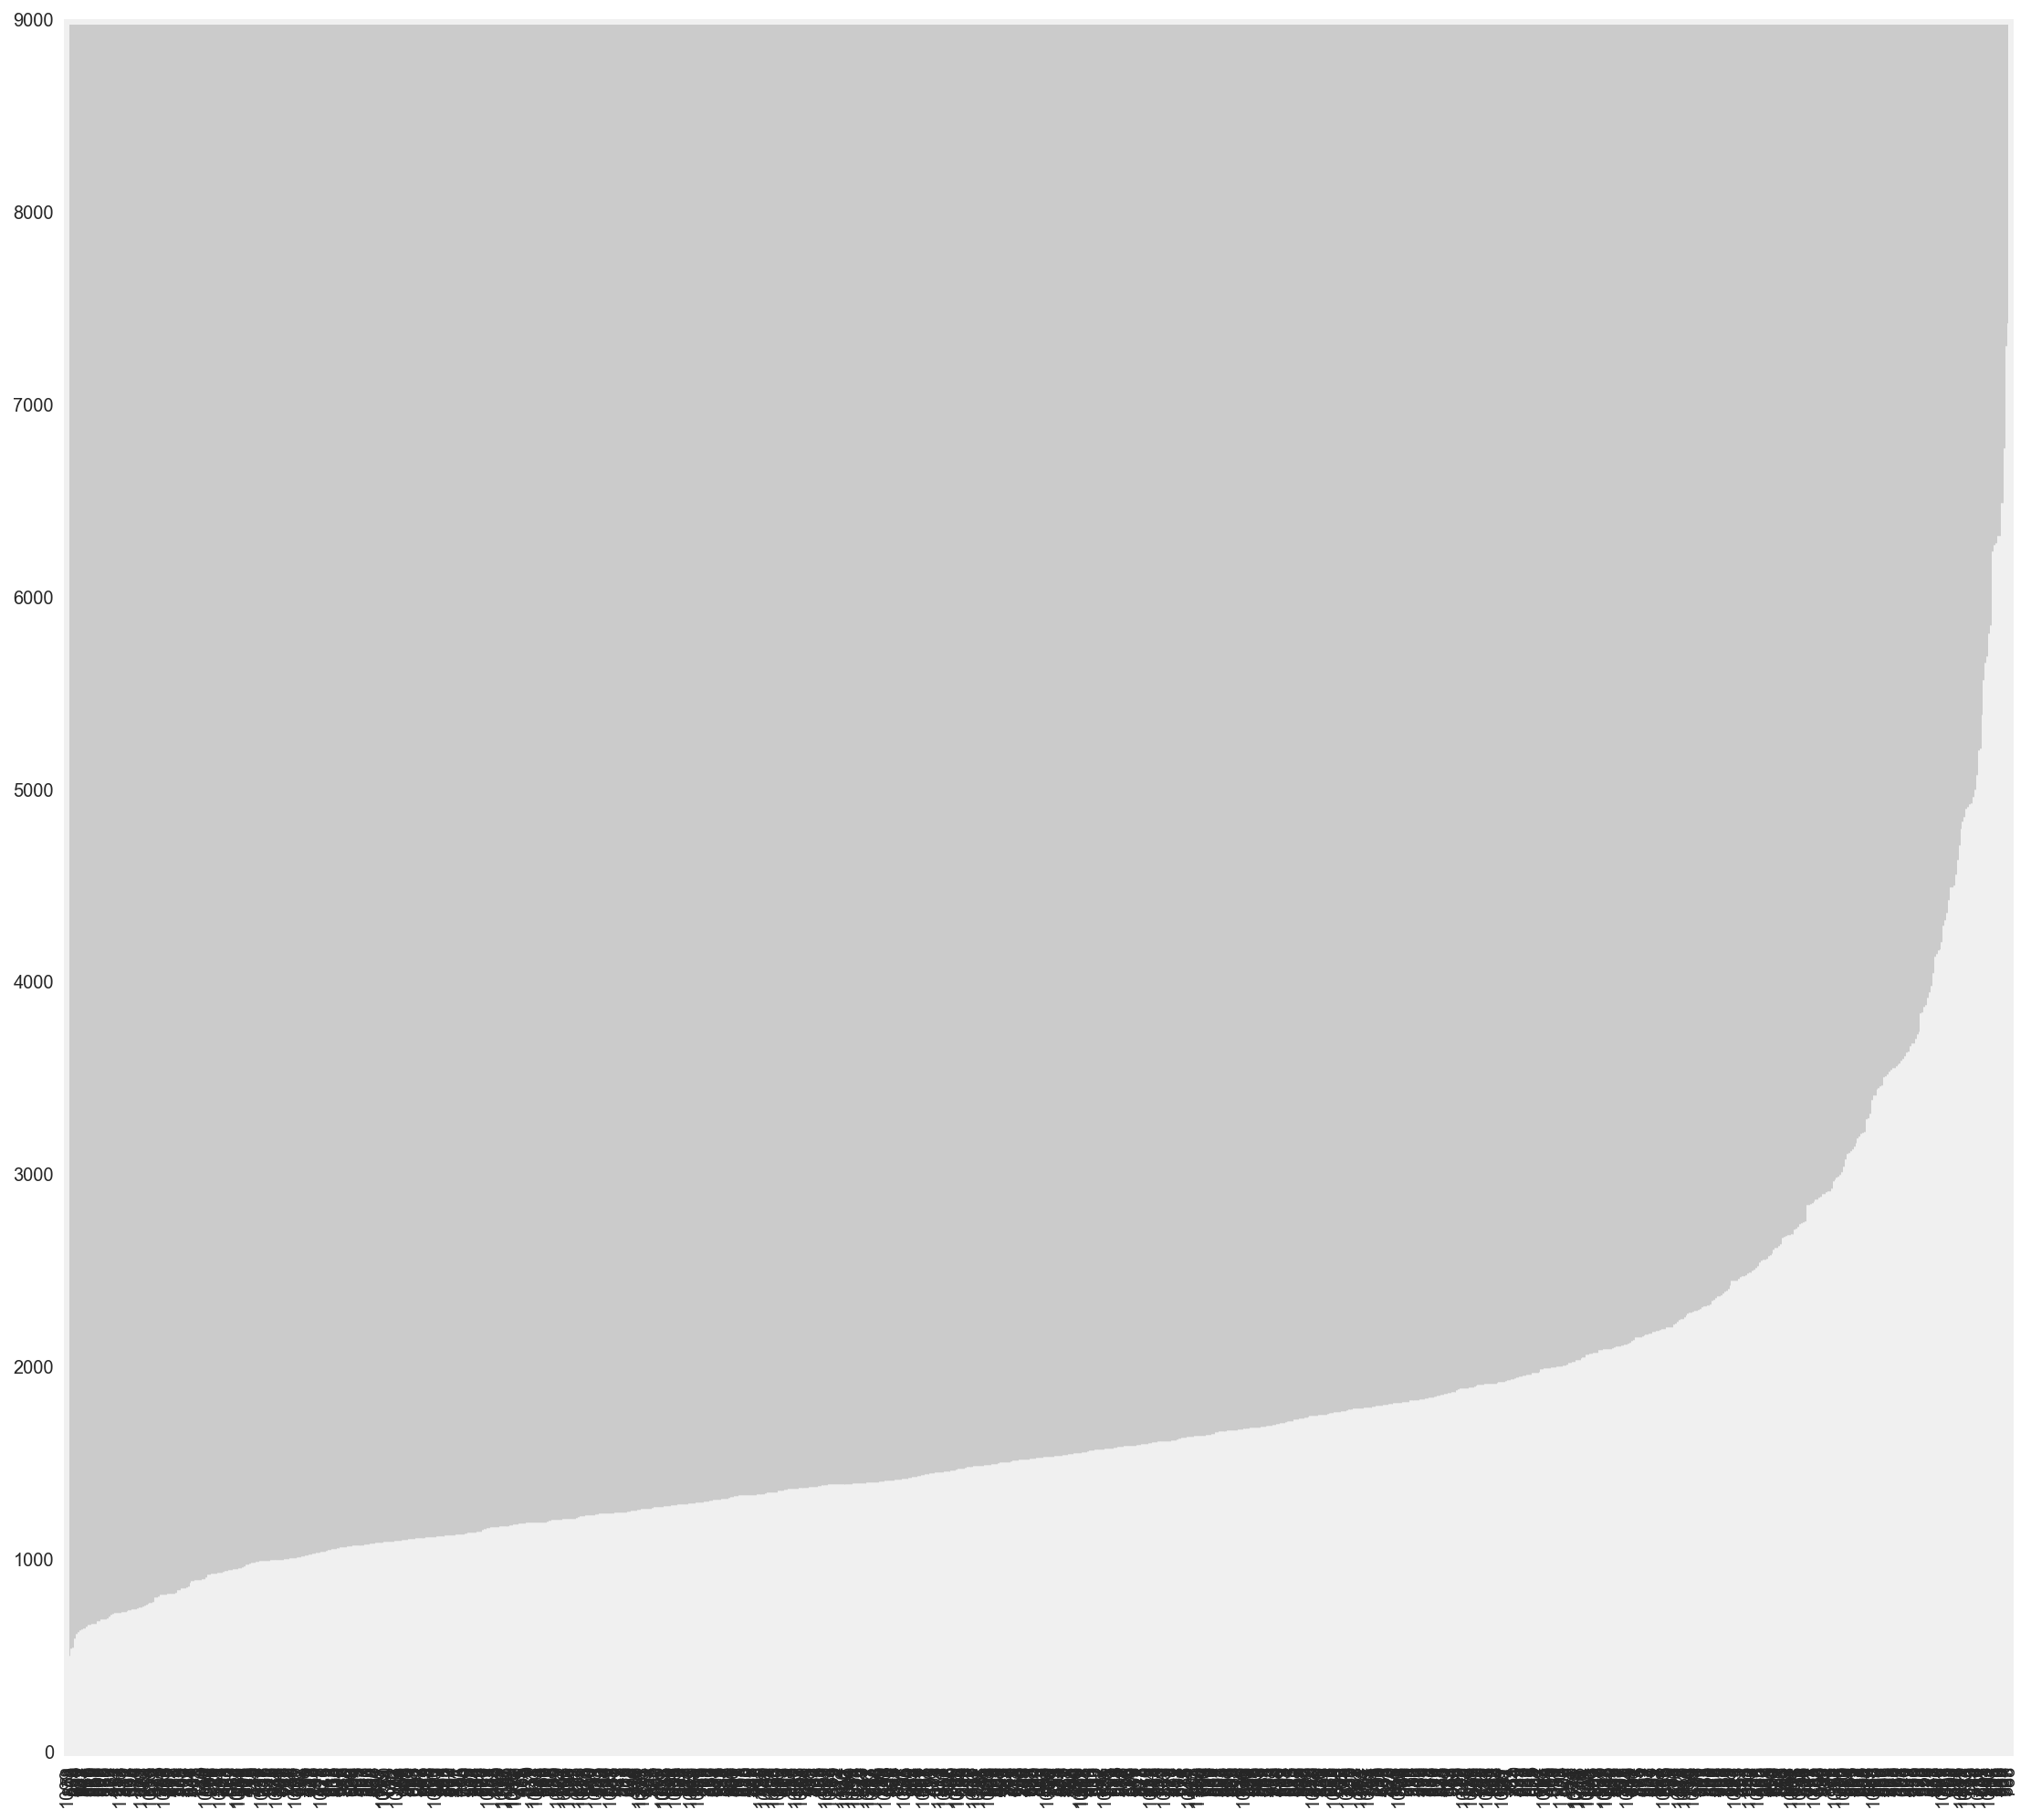

In [131]:
#selecting a range of SQFT
plt.figure(figsize=(17,17))
df.SQFT.sort_values().plot(kind='bar', color='k')
#y axis is the SQFT. x axis is the index number

The graph above seems intimidating, but it shows a trajectory of housing size sorted from the lowest value to the highest value.Interesting to notice how the size increased gradually, then had a big spike after 2000 SQFT. 

In [143]:
#To simplify the question, I started by drawing a rough range.
#looking for the price range that's +/- 500 of 2111
mask = (df.SQFT >1611) & (df.SQFT < 2611) 
price_sqft = df[mask][['ListPrice','SQFT']].sort('SQFT')
price_sqft

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,ListPrice,SQFT
1024,219900,1612
575,234900,1612
625,48900,1618
681,187500,1620
713,189900,1620
708,237000,1621
310,174900,1623
913,174900,1623
1095,195000,1624
367,149900,1624


#### Next, I'm going to use linear regression to predict price given sqft
first look for outliers


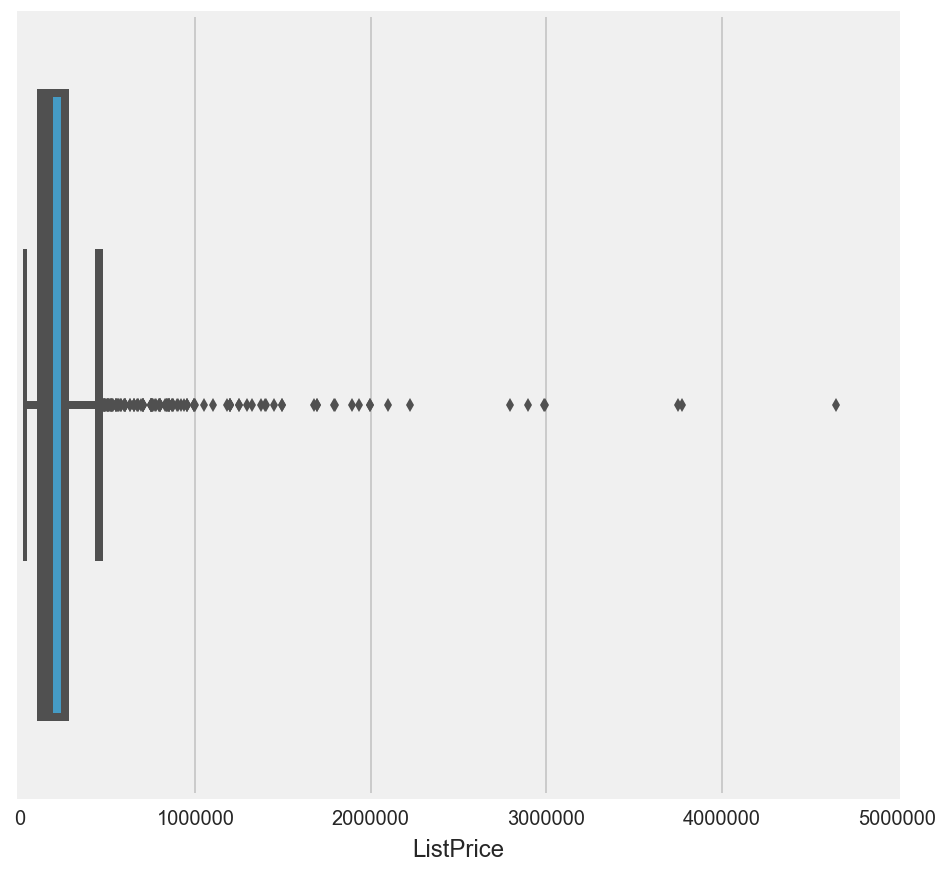

In [148]:
plt.figure(figsize=(7,7))
sns.boxplot(df.ListPrice)
#drop rows with price listed over 1000000

In [152]:
df2 = df[df.ListPrice <1000000]

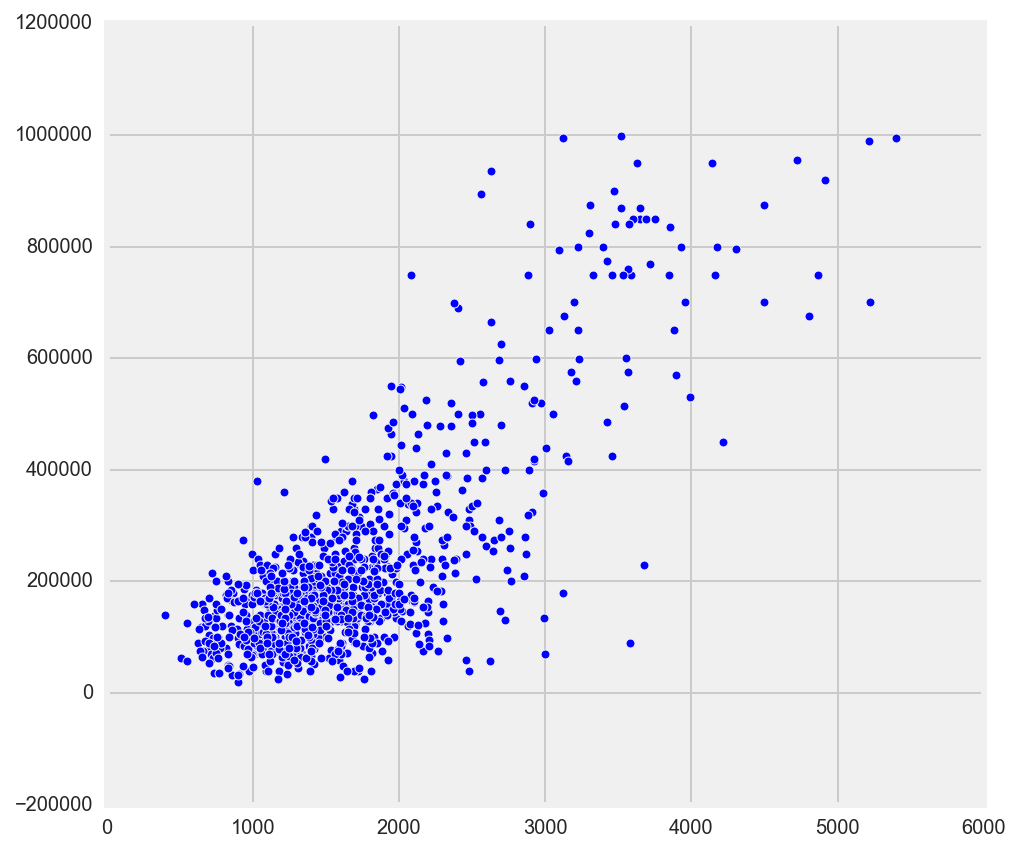

In [161]:

plt.figure(figsize=(7,7))
ax.grid(which='major', alpha=0.2)
ax.grid(which='minor', alpha=0.2)
plt.scatter(df2.SQFT, df2.ListPrice)

# we can see that there's a very wide range of price given the ~2111 SQFT

### Using linear regression to predict list price, given SQFT

In [176]:
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='ListPrice ~ SQFT', data=df2).fit()

# print the coefficients
lm.params

Intercept   -99819.053966
SQFT           190.794419
dtype: float64

- a sqaure feet increased is associated with 190.794419 USD increase in list price


In [177]:
#predicting listprice with 2111 square feet
X_new = pd.DataFrame({'SQFT': [2111]})
X_new.head()

,SQFT
0,2111


In [178]:
lm.predict(X_new)

array([ 302947.96428449])

In [189]:
lm.conf_int()
#with 95% confidence interval

,0,1
Intercept,-116124.759068,-83513.348865
SQFT,181.821425,199.767413


In [190]:
lm.pvalues
# the p-value is less than 0.05, so we can reject the null hypothesis

Intercept     2.809643e-31
SQFT         6.193794e-227
dtype: float64

In [191]:
# print the R-squared value for the model
lm.rsquared

0.6184362845025807

In [185]:
plt.figure(figsize=(7,7))
mask2 = (df.SQFT > 2000) & (df.SQFT < 2222)
df[mask2].ListPrice.describe()

count        71.000000
mean     275094.211268
std      141747.639936
min       75000.000000
25%      158945.000000
50%      249900.000000
75%      362400.000000
max      749900.000000
Name: ListPrice, dtype: float64

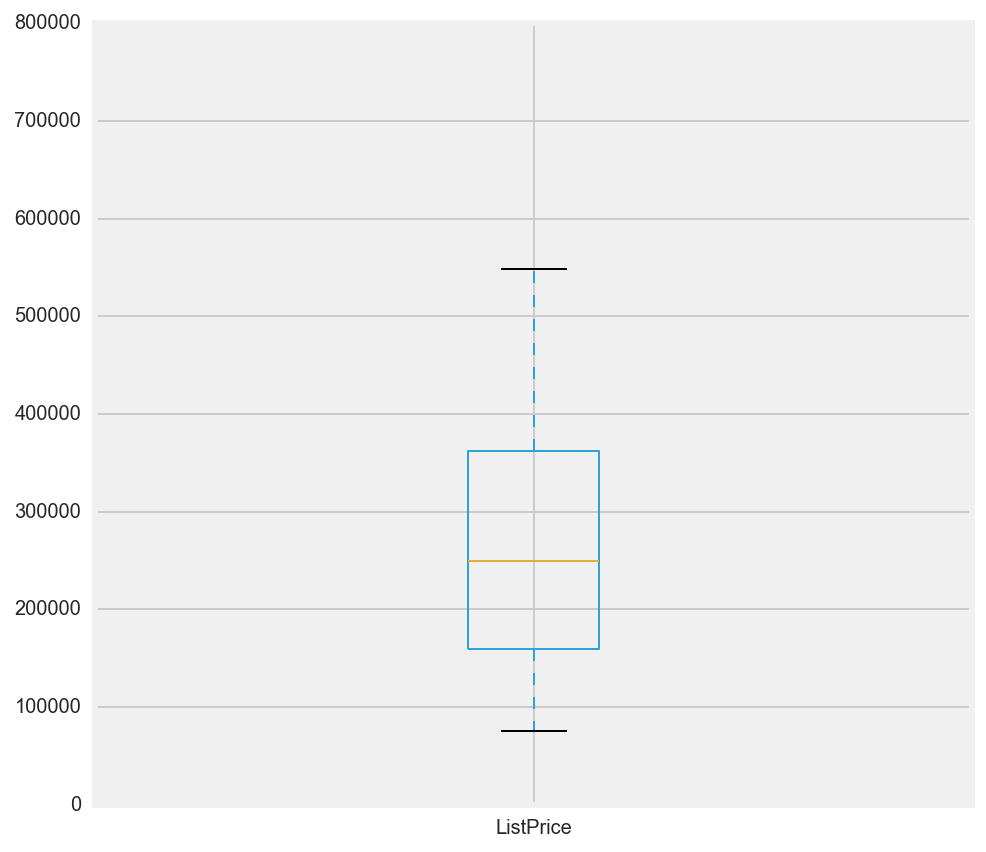

In [188]:
plt.figure(figsize=(7,7))
df[mask2].ListPrice.plot(kind='box')

### If we have a house with 2111 square ft, we estimate that the price should be $302947 
a quick check by looking at the descriptive data of houses in the similar size range, it seems like the predicted price is within a reasonable price range. (between the 50% and 75% pertentile)

# Which district should we invest in?
Imagine you are an enterprising real estate agent who has the chance to buy up a bundle of houses for sale – but you can only pick one zip code (either 55104 or 55108).
Also, you can only buy a bundle of properties priced within the middle 50% of the values – you won’t be able to buy the most expensive houses or the cheapest houses.
Assume the sample of houses in this dataset is representative for those zip codes. If you had the choice to buy 1000 homes in either 55104 or 55108 which zip code would you invest in and why? Provide your analysis and reasoning.

Need:
- listprice
- zip

Thoughts: are these two the only indicators for investments? Maybe I should also look into other variables to make better decisions...

In [324]:
df_55104 = df2[df2.ZIP == 55104]

In [326]:
df_55108 = df2[df2.ZIP == 55108]

In [327]:
df_55104.shape

(78, 20)

In [328]:
df_55108.shape

(15, 20)

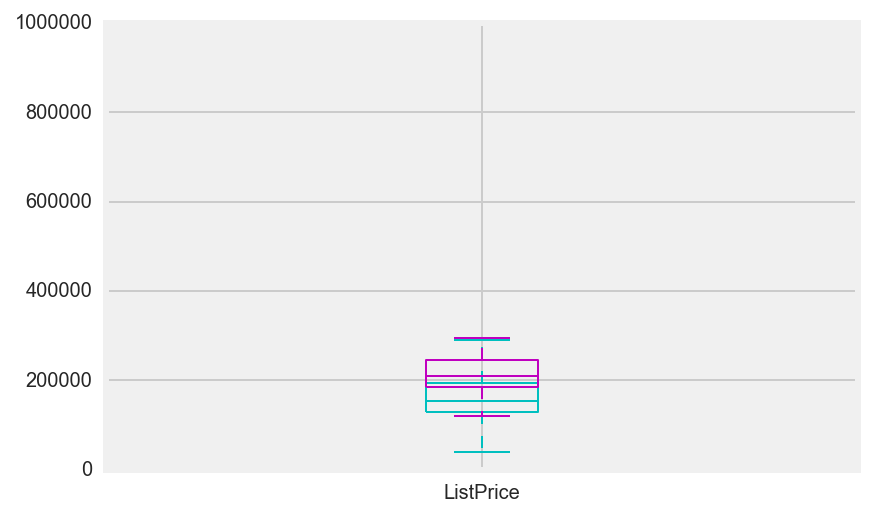

In [336]:
#investigating 55104 and 55108
df_55104.ListPrice.plot(kind='box', color='c')
df_55108.ListPrice.plot(kind='box', color='m')


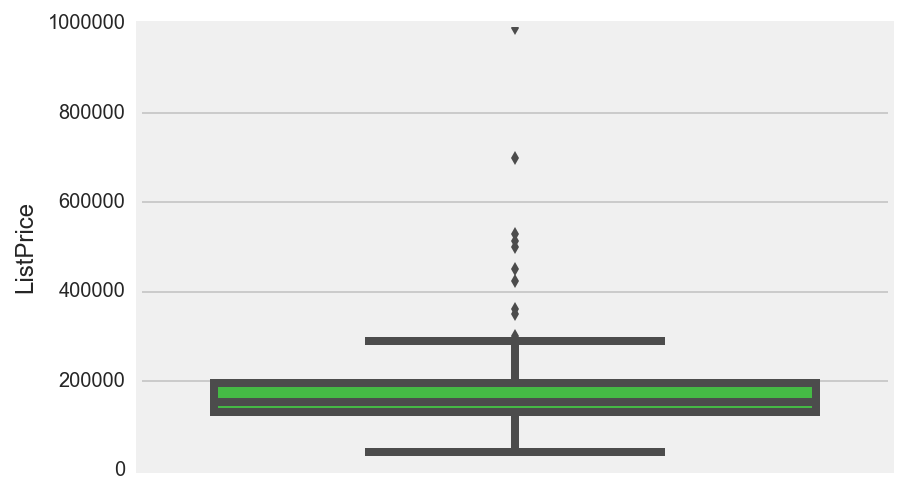

In [343]:
sns.boxplot(y='ListPrice', data=df_55104, color='limegreen')


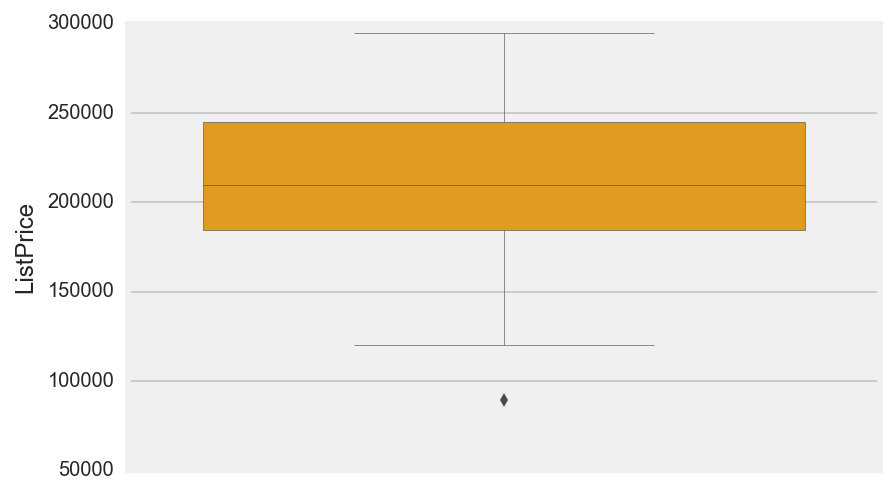

In [344]:
sns.boxplot(y='ListPrice', data=df_55108, color='orange', linewidth=.3)

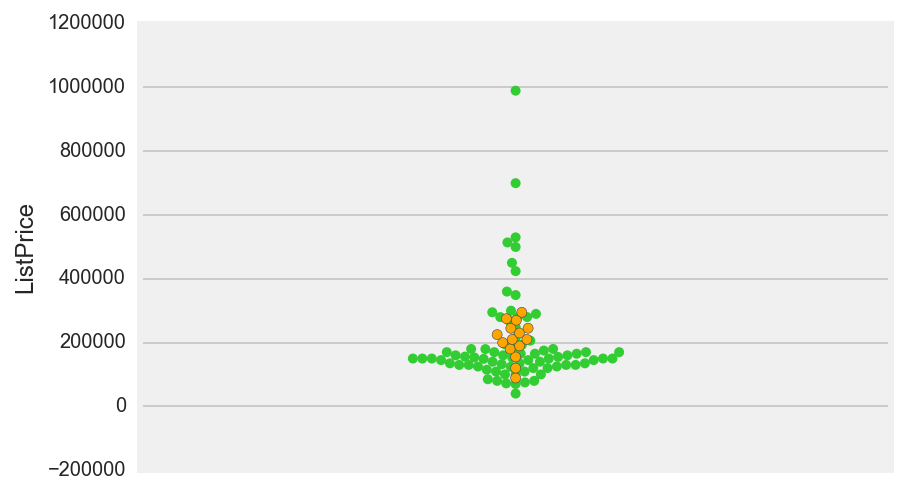

In [340]:
sns.swarmplot(y='ListPrice', data=df_55104, color='limegreen')
sns.swarmplot(y='ListPrice', data=df_55108, color='orange', linewidth=.3)

In [332]:
df_55104.ListPrice.describe()

count        78.000000
mean     200046.576923
std      147687.215387
min       40000.000000
25%      129900.000000
50%      153117.000000
75%      194425.000000
max      990000.000000
Name: ListPrice, dtype: float64

In [333]:
153117 * 1000

153117000

In [341]:
df_55108.ListPrice.describe()

count        15.000000
mean     209153.266667
std       56871.751487
min       89000.000000
25%      184700.000000
50%      209900.000000
75%      244949.500000
max      294900.000000
Name: ListPrice, dtype: float64

In [342]:
209900*1000

209900000

For zipcode 55104:
- \$153117 for 50% quantile.
- It'll cost $153,117,000 in total

For zipcode 55108:
- \$209900 for 50% quantile.
- It'll cost $209,900,000 in total

Analysis:
buy the cheaper one or the more expensive one? It's hard to tell. It depends on the future plan of the districts (new subway system ,new mall, elite schools, new companies...etc?). We also want to look at trends and ROI. We don't want to buy a cheaper district that has no growth in the future (will it still stay at the same price 5 or 10 years from now after I bought it?).

After some googling, I would recommend buying houses in 55108 district because it's in Saint Paul (high population, high home renters, a lot of schools, metropolitan district, buisness district...etc. It's a place for young professionals and working parents to live.). Saint Paul is great for buying large amount of houses then rent out to those working professionals. Higher potential for growth. Whereas, 55104 Circle Pines is more like a place for retirement, so I expect the growth would be slower since there will be less constructions for malls or subway. People tend to have higher income since they are retired and have lots of money to buy a retirement home. 

# Which features are more important to predict price?

We’re looking to understand what features of the home are most important to potentially predicting the list price of a house. What has the strongest relationship to listing price: square foot, lot size, or number of bedrooms? How do they compare? Please explain.

- assuming we are only looking at those 3 variables mentioned

In [195]:
df3 = df2[['ListPrice','SQFT','LotSize','BEDS']]
df3.head()

,ListPrice,SQFT,LotSize,BEDS
0,214000,1954,6969.0,3
1,134900,1028,4356.0,3
2,129722,1420,5227.0,4
3,134900,904,8712.0,2
4,444900,2014,12632.0,4


In [204]:
df3.info()
#missing values for LotSize

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1076 entries, 0 to 1110
Data columns (total 4 columns):
ListPrice    1076 non-null int64
SQFT         1076 non-null int64
LotSize      1014 non-null float64
BEDS         1076 non-null int64
dtypes: float64(1), int64(3)
memory usage: 42.0 KB


In [205]:
#deciding what to do with null values
df3[df3.LotSize.isnull()]

,ListPrice,SQFT,LotSize,BEDS
33,389000,2328,NaN,3
35,319000,1430,NaN,2
47,224900,1940,NaN,3
67,749900,3589,NaN,3
79,150000,759,NaN,2
85,215900,720,NaN,2
100,129900,1101,NaN,2
127,99000,900,NaN,2
128,129875,1076,NaN,1
182,125000,1512,NaN,3


In [206]:
df3[df3.LotSize.isnull()].count()
#62 out of 1076. rougly 5% have null values on Lotsize. Seems to be a relatively small amount of #.
# decided to drop


ListPrice    62
SQFT         62
LotSize       0
BEDS         62
dtype: int64

In [208]:
df3.dropna(inplace=True)

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [209]:
df3.describe()

,ListPrice,SQFT,LotSize,BEDS
count,1014.000000,1014.000000,1014.000000,1014.000000
mean,219997.954635,1676.718935,6400.125247,3.152860
std,176300.260838,721.266588,7121.993676,0.922092
min,19900.000000,510.000000,1001.000000,1.000000
25%,119900.000000,1211.250000,4791.000000,3.000000
50%,164900.000000,1524.500000,5227.000000,3.000000
75%,239900.000000,1920.750000,6534.000000,4.000000
max,999000.000000,5401.000000,136778.000000,8.000000


In [214]:
df3.corr()

,ListPrice,SQFT,LotSize,BEDS
ListPrice,1.000000,0.784666,0.124454,0.470663
SQFT,0.784666,1.000000,0.141315,0.668932
LotSize,0.124454,0.141315,1.000000,0.112625
BEDS,0.470663,0.668932,0.112625,1.000000


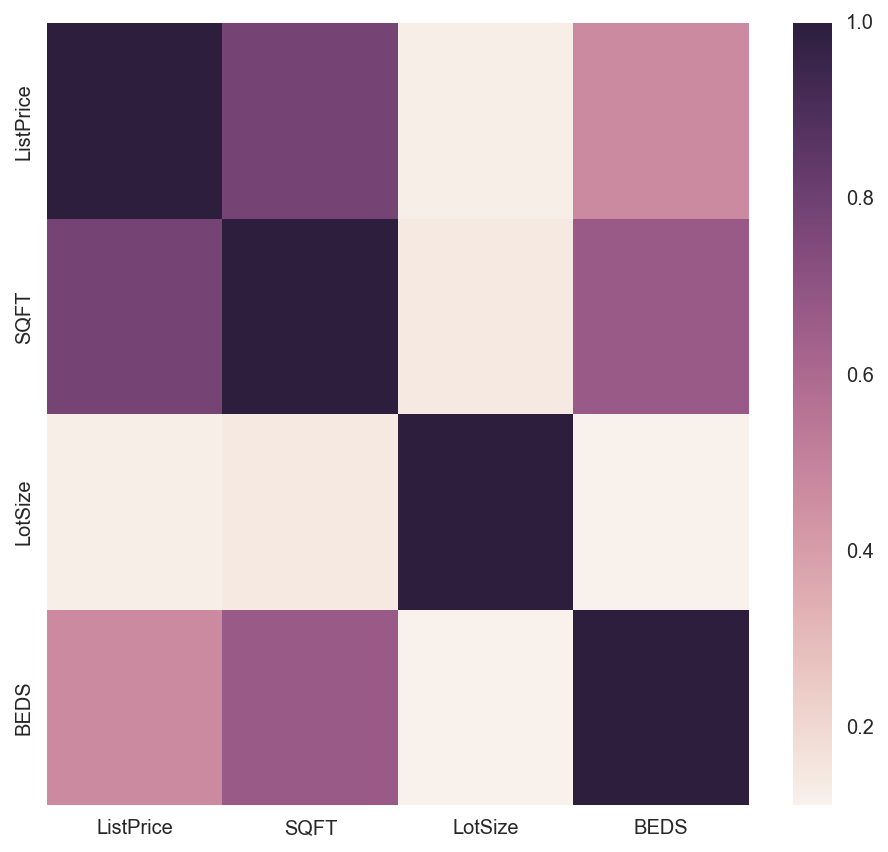

In [216]:
plt.figure(figsize=(7,7))
sns.heatmap(df3.corr())

In [210]:
# create a fitted model with all three features
lm = smf.ols(formula='ListPrice ~ SQFT + LotSize + BEDS', data=df3).fit()

# print the coefficients
lm.params

Intercept   -70744.102495
SQFT           207.386328
LotSize          0.387825
BEDS        -18861.812028
dtype: float64

In [211]:
lm.conf_int()


,0,1
Intercept,-94859.191712,-46629.013279
SQFT,194.840610,219.932047
LotSize,-0.562649,1.338298
BEDS,-28638.884727,-9084.739329


In [212]:
lm.pvalues

Intercept     1.137445e-08
SQFT         9.736832e-159
LotSize       4.234996e-01
BEDS          1.623236e-04
dtype: float64

In [213]:
lm.rsquared

0.62126319616112546

based on the correlation graph and the linear regression results:
- LotSize is not correlated with ListPrice.
- our null hypothesis is true that LotSize doesn't affect ListPrice
- SQFT has the strongest predictive power
- number of bedrooms is negatively correlated with ListPrice. Meaning that, if we add an extra bedroom, the ListPrice would be $18861 less

## Out of curiosity, also quickly look at other variables

In [222]:
df2.drop(['LastSaleDate'], axis=1, inplace=True)

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [224]:
df2.head()

,ID,ADDRESS,CITY,STATE,ZIP,ListPrice,BEDS,BATHS,LOCATION,SQFT,LotSize,YearBuilt,ParkingSpots,HasGarage,DOM,SoldPrev,Realty,LATITUDE,LONGITUDE,ShortSale
0,4416206,1000 Larpenteur Ave W,St. Paul,MN,55113,214000,3,2.00,Como,1954,6969.0,1918,2,Garage,117,Y,"Edina Realty, Inc.",44.991634,-93.142616,N
1,4423768,1004 Charles Ave,St. Paul,MN,55104,134900,3,1.00,Thomas-Dale (Frogtown),1028,4356.0,1911,1,Garage,93,Y,Fish MLS Realty,44.957291,-93.142624,N
2,4427963,1004 Euclid St,St. Paul,MN,55106,129722,4,1.00,Dayton's Bluff,1420,5227.0,1900,0,No Garage,77,N,Coldwell Banker Burnet,44.954708,-93.057976,N
3,4432178,1005 Saint Anthony Ave,St. Paul,MN,55104,134900,2,1.75,Summit-University,904,8712.0,1928,3,Garage,57,N,"Real Estate Masters, Ltd.",44.952404,-93.142693,N
4,4440070,100X Chatsworth Pl,Shoreview,MN,55126,444900,4,2.50,Shoreview,2014,12632.0,2014,3,Garage,8,N,Coldwell Banker Burnet,44.944391,-93.141348,N


In [317]:
df2[['ListPrice','BEDS','BATHS','SQFT','LotSize','ParkingSpots']].corr()

,ListPrice,BEDS,BATHS,SQFT,LotSize,ParkingSpots
ListPrice,1.000000,0.466623,0.721824,0.786407,0.124454,0.251559
BEDS,0.466623,1.000000,0.601387,0.662464,0.112625,0.183392
BATHS,0.721824,0.601387,1.000000,0.790217,0.092597,0.264829
SQFT,0.786407,0.662464,0.790217,1.000000,0.141315,0.303779
LotSize,0.124454,0.112625,0.092597,0.141315,1.000000,0.100278
ParkingSpots,0.251559,0.183392,0.264829,0.303779,0.100278,1.000000


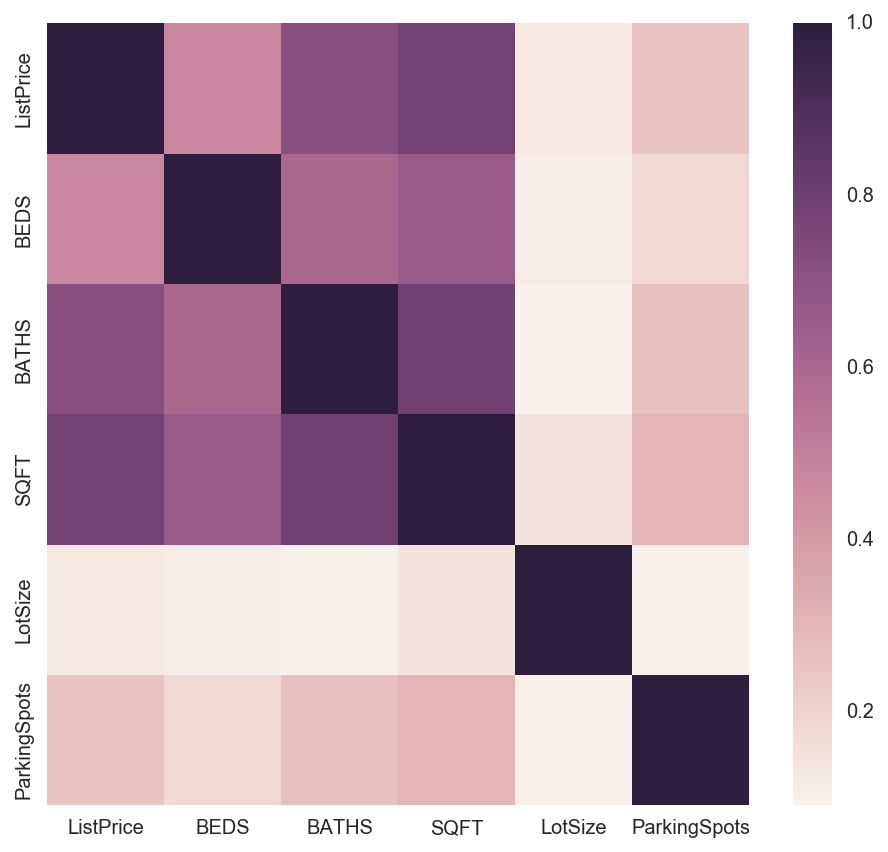

In [319]:
plt.figure(figsize=(7,7))
sns.heatmap(df2[['ListPrice','BEDS','BATHS','SQFT','LotSize','ParkingSpots']].corr())

# How would population affect listing?

We’d like to understand how listings compare with the population in their area. Take the zip code data in the 2nd sheet and match against the house listing data. What zip codes have the highest amount of listings per the population size? Show the top 10.
Separately, what zip code has the highest listing price per person? Google that zip code and provide some hypothesis and examples as to why this might be true.

- not sure what it means by population size, assuming it means per capita

In [225]:
zipcode  = pd.read_excel("/Users/KerryChowChow/Data_Science_portfolio/housing_analytics/Dataset.xlsx", 'Zips')

In [230]:
zipcode.head()

,ZipCode,Population_2010_Census
0,1001,16769
1,1002,29049
2,1003,10372
3,1005,5079
4,1007,14649


In [234]:
zipcode.rename(columns={'ZipCode':'ZIP'}, inplace=True)

In [235]:
zipcode.head(2)

,ZIP,Population_2010_Census
0,1001,16769
1,1002,29049


In [229]:
df2.head(2)

,ID,ADDRESS,CITY,STATE,ZIP,ListPrice,BEDS,BATHS,LOCATION,SQFT,LotSize,YearBuilt,ParkingSpots,HasGarage,DOM,SoldPrev,Realty,LATITUDE,LONGITUDE,ShortSale
0,4416206,1000 Larpenteur Ave W,St. Paul,MN,55113,214000,3,2.0,Como,1954,6969.0,1918,2,Garage,117,Y,"Edina Realty, Inc.",44.991634,-93.142616,N
1,4423768,1004 Charles Ave,St. Paul,MN,55104,134900,3,1.0,Thomas-Dale (Frogtown),1028,4356.0,1911,1,Garage,93,Y,Fish MLS Realty,44.957291,-93.142624,N


In [237]:
df2.shape

(1076, 20)

In [239]:
zip_df = df2.merge(zipcode,on='ZIP' )

In [252]:
# What zip codes have the highest amount of listings per the population size? Show the top 10. 
groupby_zip = zip_df.groupby(['ZIP']).ListPrice.count()
groupby_zip

ZIP
55101      2
55102     23
55103     14
55104     78
55105     50
55106    133
55107     31
55108     15
55113      1
55114      1
55116     43
55117     55
55118      3
55119     42
55126      2
55129      1
55130     19
55404      3
55405      4
55406     72
55407     57
55408     16
55409     12
55410     46
55411     45
55412    107
55413      9
55416      4
55417     59
55418     47
55419     55
55421      2
55430     25
Name: ListPrice, dtype: int64

In [260]:
#find populations for those selected zipcodes
selected = zipcode[zipcode.ZIP.isin(groupby_zip.index.tolist())]
selected.head(2)

,ZIP,Population_2010_Census
18380,55101,5592
18381,55102,18207


In [266]:
groupby_zip = groupby_zip.reset_index()

In [268]:
df4 = selected.merge(groupby_zip, on='ZIP')
df4.head()

,ZIP,Population_2010_Census,ListPrice
0,55101,5592,2
1,55102,18207,23
2,55103,12991,14
3,55104,43248,78
4,55105,28455,50


In [269]:
df4['#ListingPerPop'] = df4.ListPrice/df4.Population_2010_Census

In [281]:
df4.rename(columns={'ListPrice':'NumberofHouses'}, inplace=True)

In [284]:
top10 = df4.sort_values(['#ListingPerPop'], ascending=False).head(10)

In [285]:
top10

,ZIP,Population_2010_Census,NumberofHouses,#ListingPerPop
25,55412,22148,107,0.004831
5,55106,52730,133,0.002522
23,55410,19340,46,0.002378
28,55417,24875,59,0.002372
19,55406,32112,72,0.002242
6,55107,14776,31,0.002098
30,55419,26406,55,0.002083
3,55104,43248,78,0.001804
10,55116,23851,43,0.001803
4,55105,28455,50,0.001757


In [295]:
top10.ZIP.tolist()

[55412, 55106, 55410, 55417, 55406, 55107, 55419, 55104, 55116, 55105]

These zip codes have the highest amount of listings per the population size:
- 55412, 55106, 55410, 55417, 55406, 55107, 55419, 55104, 55116, 55105

#### what zip code has the highest listing price per person?
#### Google that zip code and provide some hypothesis and examples as to why this might be true.

1. get the average listing price for each zipcode
2. calculate avg price / population

In [300]:
avg_list_price = zip_df.groupby(['ZIP']).ListPrice.mean()
avg_list_price

ZIP
55101     67400
55102    254760
55103    103207
55104    200046
55105    392748
55106    130750
55107    144720
55108    209153
55113    214000
55114    150000
55116    368003
55117    150160
55118    154633
55119    142948
55126    464400
55129    319000
55130    124696
55404    183266
55405    699725
55406    221257
55407    195391
55408    351936
55409    368383
55410    569423
55411     96085
55412    102047
55413    195952
55416    548450
55417    224030
55418    189482
55419    389663
55421    147400
55430    123997
Name: ListPrice, dtype: int64

In [308]:
avg_list_price.shape

(33,)

In [309]:
price_cap = zipcode.merge(avg_list_price.reset_index(), on='ZIP')
price_cap

,ZIP,Population_2010_Census,ListPrice
0,55101,5592,67400
1,55102,18207,254760
2,55103,12991,103207
3,55104,43248,200046
4,55105,28455,392748
5,55106,52730,130750
6,55107,14776,144720
7,55108,14688,209153
8,55113,38994,214000
9,55114,3100,150000


In [310]:
# calculating price per capital
price_cap['price_per_cap'] = price_cap['ListPrice']/price_cap['Population_2010_Census']

In [314]:
price_cap.sort('price_per_cap', ascending=False)

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,ZIP,Population_2010_Census,ListPrice,price_per_cap
9,55114,3100,150000,48.387097
18,55405,15411,699725,45.404257
22,55409,11615,368383,31.716143
23,55410,19340,569423,29.442761
27,55416,29027,548450,18.894478
14,55126,25140,464400,18.472554
15,55129,18697,319000,17.061561
10,55116,23851,368003,15.429248
26,55413,12934,195952,15.150147
30,55419,26406,389663,14.756608


- zipcode 55114 has the highest price per person

Why is the price so high?
- Minneapolis–St. Paul is the headquarters for 19 Fortune 500 companies—more than any other metro its size—spanning retail (Target), health care (UnitedHealth), and food (General Mills). source: https://www.theatlantic.com/magazine/archive/2015/03/the-miracle-of-minneapolis/384975/
- The area has the second largest economy in the Midwest, behind only Chicago.https://en.wikipedia.org/wiki/Minneapolis%E2%80%93Saint_Paul#Economy